In [ ]:
'''
Data Transformation Steps :

1) Convert Column => from 1 data type to another

2) Normalization => Huge nos. (15 to 20 digits) converted using various methods :
    
      range of '0 to 1'; '-1 to +1' ;
    mean is calculated & subtracated from actual values for all data pts., select largest value & divide .
    
3) Encoding => represent categorical varis. into Numbers, or Vice-versa
               One-Hot Encoding, Label Encoding
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("G:\\DS150423\\DATA WRANGLING\\marketing_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### Data Transformation

#### Replace missing values of income with its Mean

In [9]:
# Remove $ sign, modify comma & 0s

df[" Income "] = df[" Income "].str.replace("$", "")
df[" Income "] = df[" Income "].str.replace(",", "")
df[" Income "] = df[" Income "].str.replace(".00", "")

C:\Users\Dell\AppData\Local\Temp/ipykernel_15772/3580861137.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[" Income "] = df[" Income "].str.replace("$", "")
C:\Users\Dell\AppData\Local\Temp/ipykernel_15772/3580861137.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[" Income "] = df[" Income "].str.replace(".00", "")


In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [11]:
# Convert to FLOAT for calculations

df[" Income "] = df[" Income "].astype(float)

In [12]:
df[" Income "].dtype

dtype('float64')

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [14]:
income_col = df[" Income "]
mean_income = income_col.mean()

mean_income

50663.01534296029

In [15]:
df[" Income "].fillna(50663.01534296029, inplace = True)

In [16]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

#### Encoding Education

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [21]:
# new coln created 

df["encoded_Edu"] = le.fit_transform(df["Education"])

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,encoded_Edu
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,2
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,2
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,2
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,2


In [23]:
df["encoded_Edu"].unique()

array([2, 4, 0, 3, 1])

In [ ]:
'''to Inverse the Encoded part'''

'''df["encoded_Edu"] = le.inverse_transform(df["encoded_Edu"])'''

In [24]:
# Drop original Education coln

df.drop("Education", axis = 1, inplace = True)
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,encoded_Edu
0,1826,1970,Divorced,84835.0,0,0,6/16/14,0,189,104,...,1,0,0,0,0,0,1,0,SP,2
1,1,1961,Single,57091.0,0,0,6/15/14,0,464,5,...,5,0,0,0,0,1,1,0,CA,2
2,10476,1958,Married,67267.0,0,1,5/13/14,0,134,11,...,2,0,0,0,0,0,0,0,US,2
3,1386,1967,Together,32474.0,1,1,5/11/14,0,10,0,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Single,21474.0,1,0,4/8/14,0,6,16,...,7,1,0,0,0,0,1,0,SP,2


#### Encode Marital Status

In [25]:
df["Marital_Status"].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [26]:
df["encoded_MariSta"] = le.fit_transform(df["Marital_Status"])

df.drop("Marital_Status", axis = 1, inplace = True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,encoded_Edu,encoded_MariSta
0,1826,1970,84835.0,0,0,6/16/14,0,189,104,379,...,0,0,0,0,0,1,0,SP,2,2
1,1,1961,57091.0,0,0,6/15/14,0,464,5,64,...,0,0,0,0,1,1,0,CA,2,4
2,10476,1958,67267.0,0,1,5/13/14,0,134,11,59,...,0,0,0,0,0,0,0,US,2,3
3,1386,1967,32474.0,1,1,5/11/14,0,10,0,1,...,0,0,0,0,0,0,0,AUS,2,5
4,5371,1989,21474.0,1,0,4/8/14,0,6,16,24,...,1,0,0,0,0,1,0,SP,2,4


#### Convert Date into 3 separate colns

In [27]:
df[["Month", "Date", "Year"]] = df["Dt_Customer"].str.split("/", expand = True)

df.drop("Dt_Customer", axis = 1, inplace = True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,encoded_Edu,encoded_MariSta,Month,Date,Year
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,0,0,1,0,SP,2,2,6,16,14
1,1,1961,57091.0,0,0,0,464,5,64,7,...,0,1,1,0,CA,2,4,6,15,14
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,US,2,3,5,13,14
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,AUS,2,5,5,11,14
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,0,0,1,0,SP,2,4,4,8,14


In [29]:
df["Month"] = df["Month"].astype("int64")
df["Date"] = df["Date"].astype("int64")
df["Year"] = df["Year"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2    Income              2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [30]:
df["encoded_country"] = le.fit_transform(df["Country"])

df.drop("Country", axis = 1, inplace = True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,encoded_Edu,encoded_MariSta,Month,Date,Year,encoded_country
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,0,0,1,0,2,2,6,16,14,6
1,1,1961,57091.0,0,0,0,464,5,64,7,...,0,1,1,0,2,4,6,15,14,1
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,2,3,5,13,14,7
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,2,5,5,11,14,0
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,0,0,1,0,2,4,4,8,14,6


#### GroupBy

In [31]:
# Grp year-vise & calculate Avg of respective colns

df.groupby("Year_Birth").mean()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,encoded_Edu,encoded_MariSta,Month,Date,Year,encoded_country
Year_Birth,,,,,,,,,,,,,,,,,,,,,
1893,11004.000000,60182.000000,0.000000,1.000000,23.000000,8.000000,0.000000,5.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,17.000000,14.000000,5.000000
1899,1150.000000,83532.000000,0.000000,0.000000,36.000000,755.000000,144.000000,562.000000,104.000000,64.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,9.000000,26.000000,13.000000,6.000000
1900,7829.000000,36640.000000,1.000000,0.000000,99.000000,15.000000,6.000000,8.000000,7.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,9.000000,26.000000,13.000000,3.000000
1940,6663.000000,51141.000000,0.000000,0.000000,96.000000,144.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,7.000000,8.000000,13.000000,6.000000
1941,6932.000000,93027.000000,0.000000,0.000000,77.000000,1285.000000,42.000000,716.000000,55.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,4.000000,13.000000,13.000000,6.000000
1943,5244.714286,60658.287906,0.000000,0.000000,61.571429,635.142857,33.142857,304.857143,127.142857,44.285714,...,0.000000,0.000000,0.428571,0.142857,3.571429,3.714286,6.000000,12.857143,13.142857,4.142857
1944,4478.428571,60054.285714,0.000000,0.000000,36.857143,566.000000,66.428571,274.857143,63.857143,35.571429,...,0.285714,0.000000,0.142857,0.000000,2.857143,3.428571,5.857143,11.857143,13.428571,4.428571
1945,5217.875000,70375.375000,0.000000,0.000000,32.625000,445.500000,67.500000,301.625000,58.125000,68.000000,...,0.000000,0.000000,0.250000,0.000000,3.375000,4.125000,7.375000,14.625000,13.125000,4.000000
1946,5049.625000,48474.375000,0.250000,0.187500,40.312500,431.937500,26.437500,185.187500,71.437500,39.937500,...,0.312500,0.000000,0.187500,0.000000,3.187500,3.937500,6.625000,20.812500,13.000000,4.875000


In [32]:
df.groupby("encoded_MariSta").mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,encoded_Edu,Month,Date,Year,encoded_country
encoded_MariSta,,,,,,,,,,,,,,,,,,,,,
0,6051.500000,1975.000000,72365.500000,0.000000,0.000000,53.000000,355.500000,84.500000,312.500000,205.500000,...,0.500000,0.500000,0.000000,0.500000,0.000000,2.500000,6.500000,14.500000,13.000000,0.500000
1,2728.333333,1973.000000,43789.000000,1.000000,0.666667,30.333333,184.666667,4.000000,26.333333,7.666667,...,0.000000,0.000000,0.000000,0.333333,0.000000,3.000000,4.333333,13.666667,13.666667,1.000000
2,5427.060345,1966.275862,51651.267241,0.413793,0.590517,49.487069,324.844828,27.426724,150.206897,35.043103,...,0.056034,0.051724,0.021552,0.206897,0.008621,2.405172,6.439655,15.810345,13.017241,4.534483
3,5633.152778,1969.579861,50141.106606,0.456019,0.511574,48.277778,299.480324,25.734954,160.681713,35.380787,...,0.076389,0.072917,0.008102,0.113426,0.009259,2.393519,6.431713,15.752315,13.039352,4.373843
4,5489.241667,1971.489583,49186.777371,0.464583,0.406250,49.506250,288.331250,26.835417,182.108333,38.216667,...,0.064583,0.064583,0.010417,0.220833,0.012500,2.372917,6.450000,15.668750,13.033333,4.604167
5,5644.674138,1967.746552,51756.808806,0.450000,0.529310,50.106897,306.825862,25.350000,168.103448,38.991379,...,0.075862,0.055172,0.020690,0.103448,0.008621,2.365517,6.510345,15.474138,13.018966,4.439655
6,5969.558442,1958.558442,54267.272927,0.233766,0.636364,49.142857,369.272727,33.090909,189.285714,51.389610,...,0.103896,0.064935,0.012987,0.246753,0.000000,2.636364,6.727273,14.935065,12.974026,4.649351
7,5812.500000,1973.000000,48432.000000,0.000000,1.000000,3.000000,322.000000,3.000000,50.000000,4.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,4.000000,10.000000,18.000000,12.000000,2.000000


In [33]:
# Get Sum

df.groupby("encoded_Edu").sum()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,encoded_MariSta,Month,Date,Year,encoded_country
encoded_Edu,,,,,,,,,,,,,,,,,,,,,
0,1134407,400321,9.468021e+06,97,83,9829,40231,5878,28675,9639,...,10,14,2,22,4,752,1389,2849,2635,883
1,291406,106783,1.065562e+06,34,5,2616,391,600,618,921,...,0,0,0,2,0,210,376,929,690,242
2,6370394,2219779,5.737827e+07,501,557,56390,320371,34683,202284,48630,...,86,82,16,152,14,4186,7143,17943,14676,5024
3,1999350,727745,1.908164e+07,168,198,17607,123238,8012,60450,11877,...,28,18,2,57,2,1391,2399,5793,4835,1594
4,2730881,955497,2.649167e+07,195,291,23563,196585,9744,81941,12990,...,39,30,10,101,1,1816,3180,7516,6347,2239


In [34]:
# Get Median

df.groupby("encoded_Edu").median()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,encoded_MariSta,Month,Date,Year,encoded_country
encoded_Edu,,,,,,,,,,,,,,,,,,,,,
0,5332.0,1975.0,46779.000000,0.0,0.0,45.0,48.0,12.0,47.0,17.0,...,0.0,0.0,0.0,0.0,0.0,3.0,7.0,13.0,13.0,6.0
1,5261.5,1979.0,20744.000000,1.0,0.0,48.0,2.0,7.0,7.0,9.0,...,0.0,0.0,0.0,0.0,0.0,4.0,8.0,17.0,13.0,6.0
2,5544.0,1970.0,50663.015343,0.0,0.0,50.0,183.0,10.0,78.0,15.0,...,0.0,0.0,0.0,0.0,0.0,4.0,6.0,16.0,13.0,6.0
3,5314.5,1968.0,50132.500000,0.0,1.0,49.0,179.0,6.0,63.5,8.0,...,0.0,0.0,0.0,0.0,0.0,4.0,6.0,16.0,13.0,6.0
4,5448.0,1967.0,54296.500000,0.0,1.0,49.0,276.5,4.0,69.0,6.0,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,15.5,13.0,6.0


#### PLots with Seaborn

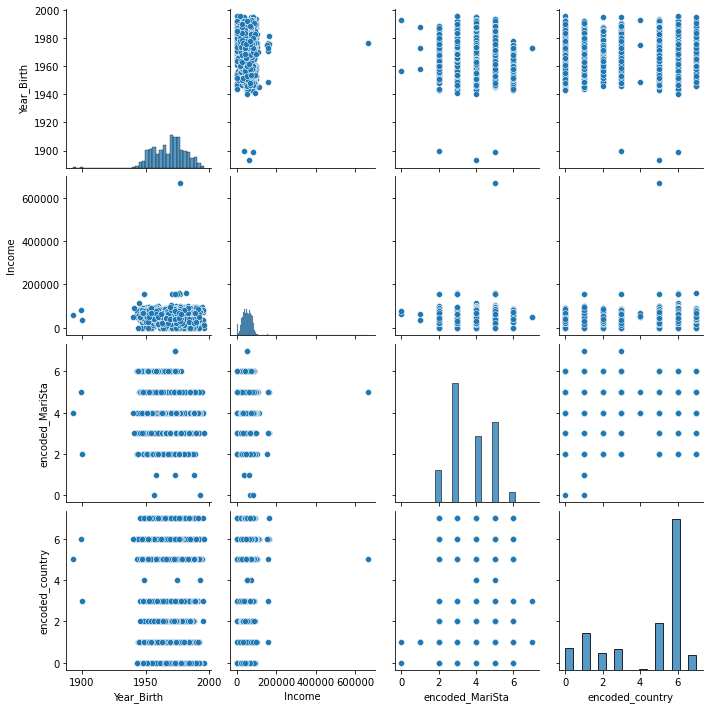

In [35]:
colns_to_plot = ["Year_Birth", " Income ", "encoded_MariSta", "encoded_country"]

df_plot = df[colns_to_plot]

sns.pairplot(df_plot)

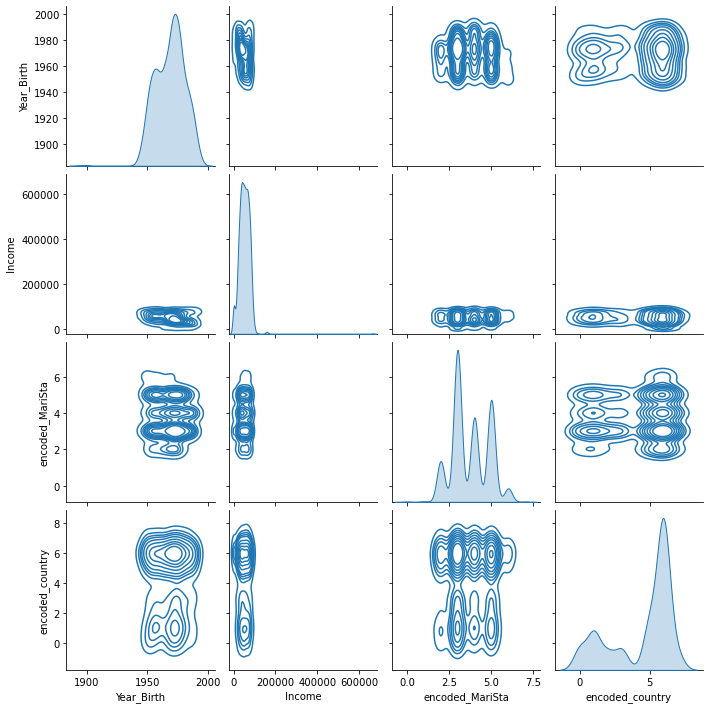

In [36]:
''' Determine Skewness & Kurtosis with this'''

sns.pairplot(df_plot, kind = "kde")

'''Kernel Density Estimate(KDE) plot => method to visualize the distribution of observations in a dataset, 
analogous to a histogram'''

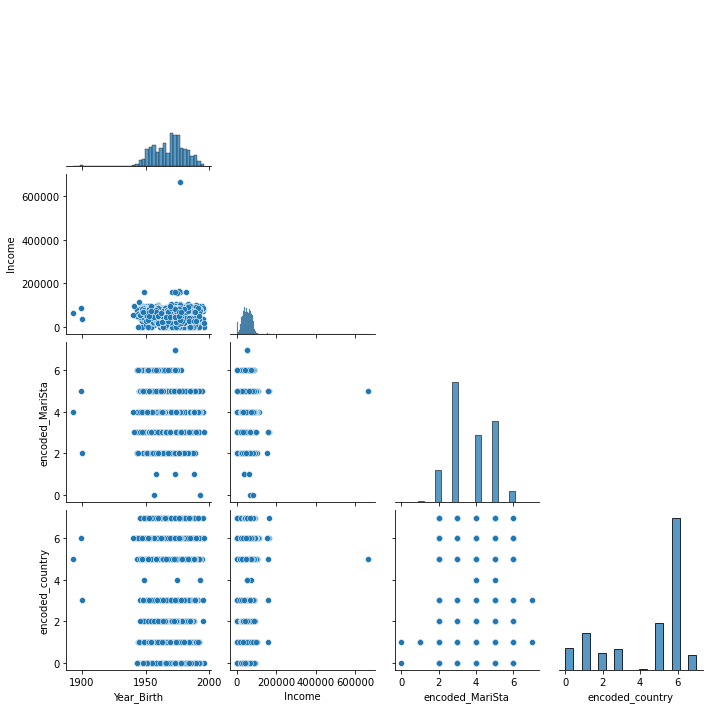

In [37]:
# Repeated plots r Unshown

sns.pairplot(df_plot, corner = True)

#### Detecting & Removing Outliers using Boxplot

<AxesSubplot:xlabel='Year_Birth'>

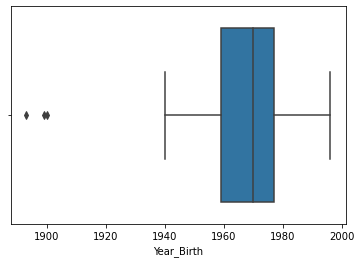

In [38]:
sns.boxplot(x = df["Year_Birth"])

In [39]:
df["Year_Birth"].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [40]:
upper_limit = df["Year_Birth"].quantile(0.95)  # > 75%
lower_limit = df["Year_Birth"].quantile(0.1)   # < 25%

print(upper_limit) 
print(lower_limit)

1988.0
1952.0


In [41]:
df["Year_Birth"] = df["Year_Birth"].clip(lower_limit, upper_limit, axis = 0)

<AxesSubplot:xlabel='Year_Birth'>

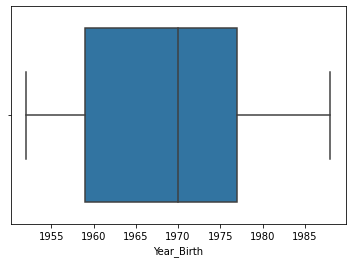

In [42]:
# No Outliers

sns.boxplot(x = df["Year_Birth"])

#### SCALING : 1) MinMax 2) Standard 3) Robust


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [52]:
min_max_sca = MinMaxScaler()
stand_sca = StandardScaler()
rob_sca = RobustScaler()

In [47]:
df["Recency"].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [53]:
df["min_max_Recency"] = min_max_sca.fit_transform(df["Recency"].values.reshape(-1,1))

df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Response,Complain,encoded_Edu,encoded_MariSta,Month,Date,Year,encoded_country,min_max_Recency
0,1826,1970.0,84835.0,0,0,0,189,104,379,111,...,0,1,0,2,2,6,16,14,6,0.0
1,1,1961.0,57091.0,0,0,0,464,5,64,7,...,1,1,0,2,4,6,15,14,1,0.0
2,10476,1958.0,67267.0,0,1,0,134,11,59,15,...,0,0,0,2,3,5,13,14,7,0.0
3,1386,1967.0,32474.0,1,1,0,10,0,1,0,...,0,0,0,2,5,5,11,14,0,0.0
4,5371,1988.0,21474.0,1,0,0,6,16,24,11,...,0,1,0,2,4,4,8,14,6,0.0


In [54]:
df["min_max_Recency"].describe()

count    2240.000000
mean        0.496054
std         0.292550
min         0.000000
25%         0.242424
50%         0.494949
75%         0.747475
max         1.000000
Name: min_max_Recency, dtype: float64

In [55]:
df["stand_sca_Recency"] = stand_sca.fit_transform(df["Recency"].values.reshape(-1,1))
df["stand_sca_Recency"].describe()

count    2.240000e+03
mean     1.308477e-17
std      1.000223e+00
min     -1.696001e+00
25%     -8.671566e-01
50%     -3.777284e-03
75%      8.596020e-01
max      1.722981e+00
Name: stand_sca_Recency, dtype: float64

In [56]:
df["rob_Recency"] = rob_sca.fit_transform(df["Recency"].values.reshape(-1,1))
df["rob_Recency"].describe()

count    2240.000000
mean        0.002188
std         0.579249
min        -0.980000
25%        -0.500000
50%         0.000000
75%         0.500000
max         1.000000
Name: rob_Recency, dtype: float64

In [ ]:
'Min-MAx Scaler' => rescaling the range of features to scale the range in [0, 1] or [−1, 1].

Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

In [ ]:
'Standard Scaler' => resize the distribution of values, so mean of observed values is 0 & the standard deviation is 1.

removes the mean and scales each feature/variable to unit variance ; is performed feature-wise in an independent way.